In [1]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')

import pyrcel as pm
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
P0 = 77500. # Pressure, Pa
T0 = 274.   # Temperature, K
S0 = -0.02  # Supersaturation, 1-RH (98% here)

In [3]:
sulfate =  pm.AerosolSpecies('sulfate',
                             pm.Lognorm(mu=0.015, sigma=1.6, N=150.),
                             kappa=0.54, bins=200)
sea_salt = pm.AerosolSpecies('sea salt',
                             pm.Lognorm(mu=0.85, sigma=1.2, N=10.),
                             kappa=1.2, bins=40)

In [4]:
ms = np.array([0.05, 0.045, 0.090])
sgs = np.array([1.6, 2.3, 1.5])
Nss = np.array([150, 450, 300])
sulfate =  pm.AerosolSpecies('sulfate',
                             pm.MultiModeLognorm(mus=ms, sigmas=sgs, Ns=Nss),
                             kappa=0.54, bins=200)

ms1 = np.array([0.030, 0.040, 0.056])
sgs1 = np.array([1.2, 1.3, 2.5])
Nss1 = np.array([250, 550, 400])
sea_salt =  pm.AerosolSpecies('sea salt',
                             pm.MultiModeLognorm(mus=ms1, sigmas=sgs1, Ns=Nss1),
                             kappa=0.54, bins=200)

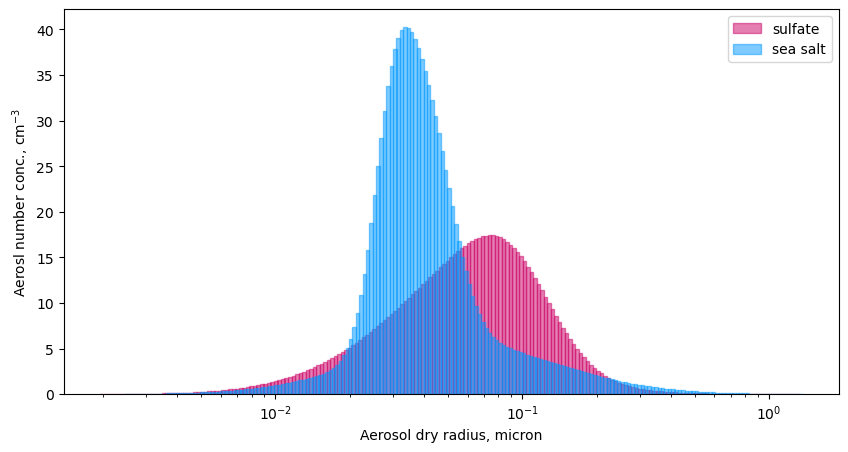

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(False, "minor")

sul_c = "#CC0066"
ax.bar(sulfate.rs[:-1], sulfate.Nis*1e-6, np.diff(sulfate.rs),
        color=sul_c, label="sulfate", edgecolor="#CC0066", alpha=0.5)
#'''
sea_c = "#0099FF"
ax.bar(sea_salt.rs[:-1], sea_salt.Nis*1e-6, np.diff(sea_salt.rs),
        color=sea_c, label="sea salt", edgecolor="#0099FF", alpha=0.5)
#'''
ax.semilogx()

ax.set_xlabel("Aerosol dry radius, micron")
ax.set_ylabel("Aerosl number conc., cm$^{-3}$")
ax.legend(loc='upper right')

In [6]:
initial_aerosols = [sulfate, sea_salt]
V = 1.0 # updraft speed, m/s

dt = 1.0 # timestep, seconds
t_end = 250./V # end time, seconds... 250 meter simulation

model = pm.ParcelModel(initial_aerosols, V, T0, S0, P0, console=False, accom=0.3)
parcel_trace, aerosol_traces = model.run(t_end, dt, solver="cvode")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### z - altitude, meter
### P - pressure, Pa
### T - temperature, K
### wv - water vapour mass mixing ratio, kg/kg
### wc - cloud liquid water mass mixing ratio, kg/kg
### wi - cloud ice water mass mixing ration, kg/kg
### S - parcel supersaturation
### rho - aerosol bin sizes (radii), meter

In [6]:
parcel_trace

,z,P,T,wv,wc,wi,S,rho
0.0,0.0,77500.000000,274.000000,0.005155,0.000002,0.0,-0.020000,0.980137
1.0,1.0,77490.385534,273.990244,0.005155,0.000002,0.0,-0.019493,0.980051
2.0,2.0,77480.771918,273.980512,0.005155,0.000002,0.0,-0.018989,0.979964
3.0,3.0,77471.159154,273.970798,0.005155,0.000002,0.0,-0.018488,0.979877
4.0,4.0,77461.547242,273.961096,0.005155,0.000002,0.0,-0.017989,0.979791
...,...,...,...,...,...,...,...,...
245.0,245.0,75171.892710,272.274077,0.004857,0.000300,0.0,0.001493,0.956930
246.0,246.0,75162.506349,272.267560,0.004856,0.000301,0.0,0.001491,0.956834
247.0,247.0,75153.120927,272.261041,0.004854,0.000303,0.0,0.001488,0.956738
248.0,248.0,75143.736444,272.254523,0.004853,0.000304,0.0,0.001486,0.956643


In [7]:
aerosol_traces

{'sulfate':                r000          r001          r002          r003          r004  \
 0.0    1.019456e-09  1.051637e-09  1.084943e-09  1.119419e-09  1.155110e-09   
 1.0    1.019503e-09  1.051688e-09  1.085000e-09  1.119481e-09  1.155179e-09   
 2.0    1.019549e-09  1.051739e-09  1.085056e-09  1.119543e-09  1.155247e-09   
 3.0    1.019595e-09  1.051790e-09  1.085112e-09  1.119605e-09  1.155314e-09   
 4.0    1.019641e-09  1.051840e-09  1.085167e-09  1.119666e-09  1.155382e-09   
 ...             ...           ...           ...           ...           ...   
 245.0  1.020505e-09  1.052829e-09  1.086294e-09  1.120948e-09  1.156835e-09   
 246.0  1.020500e-09  1.052823e-09  1.086289e-09  1.120942e-09  1.156829e-09   
 247.0  1.020495e-09  1.052818e-09  1.086283e-09  1.120936e-09  1.156822e-09   
 248.0  1.020490e-09  1.052813e-09  1.086278e-09  1.120930e-09  1.156816e-09   
 249.0  1.020485e-09  1.052808e-09  1.086272e-09  1.120924e-09  1.156810e-09   
 
                r005       

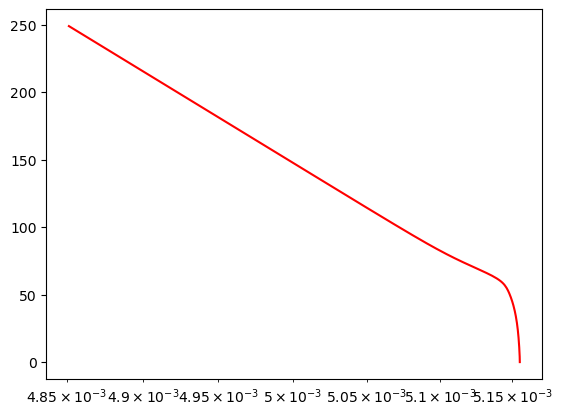

In [32]:
#plt.plot(parcel_trace['T'], parcel_trace['z'], color='r', lw=1.5)
plt.plot(parcel_trace['wv'], parcel_trace['z'], color='r', lw=1.5)
#plt.plot(parcel_trace['wc'], parcel_trace['z'], color='b', lw=1.5)
plt.xscale('log')

In [18]:
aerosol_traces['sulfate'].values

array([[1.01945590e-09, 1.05163650e-09, 1.08494306e-09, ...,
        6.56880773e-07, 6.75858193e-07, 6.95369992e-07],
       [1.01950254e-09, 1.05168788e-09, 1.08499962e-09, ...,
        6.61309458e-07, 6.80384167e-07, 6.99992908e-07],
       [1.01954884e-09, 1.05173888e-09, 1.08505577e-09, ...,
        6.66612183e-07, 6.85846627e-07, 7.05619249e-07],
       ...,
       [1.02049520e-09, 1.05281817e-09, 1.08628323e-09, ...,
        7.99942952e-06, 8.01663427e-06, 8.03445880e-06],
       [1.02049027e-09, 1.05281292e-09, 1.08627763e-09, ...,
        8.01090342e-06, 8.02809571e-06, 8.04590770e-06],
       [1.02048535e-09, 1.05280766e-09, 1.08627203e-09, ...,
        8.02233876e-06, 8.03951867e-06, 8.05731818e-06]])

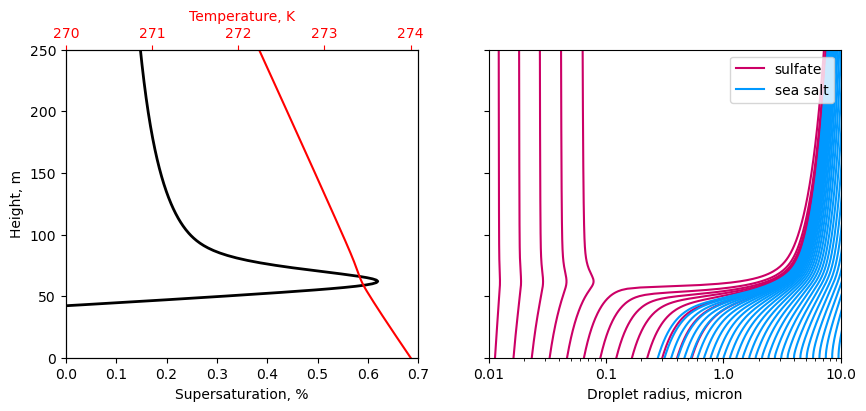

In [13]:
fig, [axS, axA] = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axS.plot(parcel_trace['S']*100., parcel_trace['z'], color='k', lw=2)
axT = axS.twiny()
axT.plot(parcel_trace['T'], parcel_trace['z'], color='r', lw=1.5)

Smax = parcel_trace['S'].max()*100
'''
z_at_smax = parcel_trace['z'].ix[parcel_trace['S'].argmax()]
axS.annotate("max S = %0.2f%%" % Smax,
             xy=(Smax, z_at_smax),
             xytext=(Smax-0.3, z_at_smax+50.),
             arrowprops=dict(arrowstyle="->", color='k',
                             connectionstyle='angle3,angleA=0,angleB=90'),
             zorder=10)
'''
axS.set_xlim(0, 0.7)
axS.set_ylim(0, 250)

axT.set_xticks([270, 271, 272, 273, 274])
axT.xaxis.label.set_color('red')
axT.tick_params(axis='x', colors='red')

axS.set_xlabel("Supersaturation, %")
axT.set_xlabel("Temperature, K")
axS.set_ylabel("Height, m")

sulf_array = aerosol_traces['sulfate'].values
sea_array = aerosol_traces['sea salt'].values

ss = axA.plot(sulf_array[:, ::10]*1e6, parcel_trace['z'], color=sul_c,
         label="sulfate")
sa = axA.plot(sea_array*1e6, parcel_trace['z'], color=sea_c, label="sea salt")
axA.semilogx()
axA.set_xlim(1e-2, 10.)
axA.set_xticks([1e-2, 1e-1, 1e0, 1e1], [0.01, 0.1, 1.0, 10.0])
axA.legend([ss[0], sa[0]], ['sulfate', 'sea salt'], loc='upper right')
axA.set_xlabel("Droplet radius, micron")

for ax in [axS, axA, axT]:
    ax.grid(False, 'both', 'both')